In [247]:
import requests
import pickle
import pandas as pd
import json as js
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from matplotlib.dates import DateFormatter, date2num

In [96]:
players_df = pd.concat(map(pd.read_csv, ['players_df_500.csv', 'players_df_1082.csv']))
teams_df = pd.concat(map(pd.read_csv, ['teams_df_500.csv', 'teams_df_1082.csv']))
teams_df = teams_df.drop_duplicates()
teams_df = teams_df.sort_values('id')
games_df = pd.concat(map(pd.read_csv, ['games_df_500.csv', 'games_df_1082.csv']))
#events_df = pd.read_csv('events_df.csv')
#players_df
#teams_df
#games_df
#events_df

In [201]:
#events_df = pd.read_csv('events_df_500.csv')
events_df = pd.concat(map(pd.read_csv, ['events_df_500.csv', 'events_df_1082.csv']))

In [202]:
events_df = events_df.fillna(0)
events_df = events_df.astype({'player1Id': 'int64','player2Id':'int64','player3Id':'int64','player4Id':'int64'})

In [186]:
events_df.dtypes
#events_df

gameId             int64
eventId            int64
eventType         object
eventTypeDesc     object
period             int64
periodTime        object
periodType        object
teamAwayID         int64
teamHomeID         int64
goalsHome          int64
goalsAway          int64
coX              float64
coY              float64
player1Id          int64
player1Type       object
player2Id          int64
player2Type       object
player3Id          int64
player3Type       object
player4Id          int64
player4Type       object
dtype: object

In [203]:
#events_df['periodTime'] = pd.to_datetime(events_df['periodTime'], format='%M:%S').dt.time
events_df['periodTime'] = pd.to_timedelta(events_df['periodTime'].apply(lambda x: f'00:{x}'))
#events_df['periodTime'] = events_df['periodTime'].astype(str).map(lambda x: x[7:])
#events_df.dtypes
events_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,teamAwayID,teamHomeID,goalsHome,...,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,2019020001,1,Period Ready,Period Ready,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,2019020001,2,Period Start,Period Start,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,8475166,Winner,8478400,Loser,0,0,0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,0 days 00:00:25,REGULAR,9,10,0,...,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400,Assist,8475883,Goalie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183653,2019021082,303,Blocked Shot,Martin Frk shot blocked shot by Anthony Duclair,3,0 days 00:19:47,REGULAR,9,26,3,...,-51.0,-27.0,8477407,Blocker,8476924,Shooter,0,0,0,0
183654,2019021082,304,Period End,End of 3rd Period,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0
183655,2019021082,305,Period Official,Period Official,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0
183656,2019021082,306,Game End,Game End,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0


In [204]:
events_df.dtypes

gameId                     int64
eventId                    int64
eventType                 object
eventTypeDesc             object
period                     int64
periodTime       timedelta64[ns]
periodType                object
teamAwayID                 int64
teamHomeID                 int64
goalsHome                  int64
goalsAway                  int64
coX                      float64
coY                      float64
player1Id                  int64
player1Type               object
player2Id                  int64
player2Type               object
player3Id                  int64
player3Type               object
player4Id                  int64
player4Type               object
dtype: object

In [6]:
avg_age = pd.DataFrame()
avg_age = round(players_df.groupby('teamID')['currentAge'].mean(),1).sort_values()
teamsname = teams_df[['id','name']]
#avg_age = avg_age.to_frame()
#avg_age.dtypes
#avg_age.join(teams_df, on='teamID', how='left', lsuffix='teamID', rsuffix='id')
#teamsname
agebyteams = pd.merge(left=avg_age, right=teamsname, left_on='teamID', right_on='id', how='left')
agebyteams

,currentAge,id,name
0,28.2,3,New York Rangers
1,28.3,12,Carolina Hurricanes
2,28.3,7,Buffalo Sabres
3,28.3,29,Columbus Blue Jackets
4,28.4,52,Winnipeg Jets
5,28.7,1,New Jersey Devils
6,28.7,10,Toronto Maple Leafs
7,28.8,21,Colorado Avalanche
8,29.1,24,Anaheim Ducks
9,29.2,4,Philadelphia Flyers


In [153]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,teamAwayID,teamHomeID,goalsHome,...,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,9,10,0,...,0.0,0.0,8475166,Winner,8478400,Loser,0,0,0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,9,10,0,...,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400,Assist,8475883,Goalie


Text(0.5, 0, 'Kor')

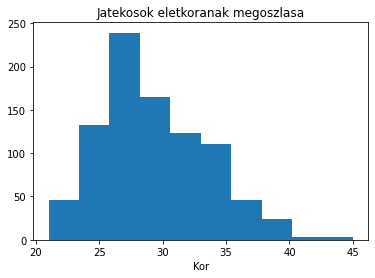

In [95]:
playersage = players_df[['id','currentAge']]
playersage = playersage.drop_duplicates()
playersage = playersage.drop(columns=['id'])
plt.hist(playersage)
plt.title('Jatekosok eletkoranak megoszlasa')
plt.xlabel('Kor')

In [79]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,0,0,0.0,0.0,8475166,Winner,8478400,Loser,0.0,0,0.0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,0,1,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400.0,Assist,8475883.0,Goalie


In [280]:
sog_df = pd.DataFrame()
sog_df = events_df[events_df['eventType'].isin(['Goal'])]
sog_df = sog_df[sog_df['player4Id'].isin([8471239])]
sog_df = sog_df.drop_duplicates()
sog_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,teamAwayID,teamHomeID,goalsHome,...,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
4205,2019020013,176,Goal,"Dmitry Kulikov (1) Slap Shot, assists: Nikolaj...",2,0 days 00:19:49,REGULAR,52,1,4,...,34.0,12.0,8475179,Scorer,8477940,Assist,8476460,Assist,8471239,Goalie
4229,2019020013,200,Goal,"Jack Roslovic (1) Wrist Shot, assists: Neal Pi...",3,0 days 00:02:41,REGULAR,52,1,4,...,-71.0,-18.0,8478458,Scorer,8480145,Assist,8473618,Assist,8471239,Goalie
14422,2019020045,166,Goal,"Ivan Provorov (1) Slap Shot, assists: Matt Nis...",2,0 days 00:09:52,REGULAR,1,4,1,...,49.0,31.0,8478500,Scorer,8471702,Assist,8478439,Assist,8471239,Goalie
14495,2019020045,239,Goal,"Sean Couturier (1) Backhand, assists: Oskar Li...",3,0 days 00:00:57,REGULAR,1,4,3,...,-77.0,1.0,8476461,Scorer,8478067,Assist,8478500,Assist,8471239,Goalie
20489,2019020064,56,Goal,"Joakim Nordstrom (1) Snap Shot, assists: Chris...",1,0 days 00:11:22,REGULAR,1,6,2,...,79.0,-1.0,8475807,Scorer,8475780,Assist,8476374,Assist,8471239,Goalie
20626,2019020064,193,Goal,"Patrice Bergeron (1) Wrist Shot, assists: Jake...",2,0 days 00:19:14,REGULAR,1,6,3,...,-82.0,-3.0,8470638,Scorer,8478498,Assist,8473419,Assist,8471239,Goalie
25700,2019020080,6,Goal,"Jonathan Huberdeau (1) Snap Shot, assists: Evg...",1,0 days 00:00:16,REGULAR,13,1,0,...,-84.0,-4.0,8476456,Scorer,8474149,Assist,8477493,Assist,8471239,Goalie
25876,2019020080,182,Goal,"Brett Connolly (2) Snap Shot, assists: Mike Ho...",2,0 days 00:19:52,REGULAR,13,1,4,...,67.0,-14.0,8475792,Scorer,8474884,Assist,8476389,Assist,8471239,Goalie
25885,2019020080,191,Goal,"MacKenzie Weegar (2) Slap Shot, assists: Aaron...",3,0 days 00:00:30,REGULAR,13,1,4,...,-49.0,-27.0,8477346,Scorer,8477932,Assist,8476389,Assist,8471239,Goalie
25915,2019020080,221,Goal,"Noel Acciari (2) Tip-In, assists: MacKenzie We...",3,0 days 00:07:30,REGULAR,13,1,4,...,-73.0,0.0,8478569,Scorer,8477346,Assist,8477932,Assist,8471239,Goalie


In [281]:
for idx, i in enumerate(sog_df['coX']):
    #print(i)
    if i<0:
        #print(i, sog_df['coY'].iloc[idx])
        sog_df['coX'].iloc[idx] = abs(sog_df['coX'].iloc[idx])
        sog_df['coY'].iloc[idx] = sog_df['coY'].iloc[idx]*-1
        #print(i, sog_df['coY'].iloc[idx])
#sog_df['coY'] = sog_df['coY'].abs()
sog_df

/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/817700746.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sog_df['coX'].iloc[idx] = abs(sog_df['coX'].iloc[idx])
/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/817700746.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sog_df['coY'].iloc[idx] = sog_df['coY'].iloc[idx]*-1


,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,teamAwayID,teamHomeID,goalsHome,...,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
4205,2019020013,176,Goal,"Dmitry Kulikov (1) Slap Shot, assists: Nikolaj...",2,0 days 00:19:49,REGULAR,52,1,4,...,34.0,12.0,8475179,Scorer,8477940,Assist,8476460,Assist,8471239,Goalie
4229,2019020013,200,Goal,"Jack Roslovic (1) Wrist Shot, assists: Neal Pi...",3,0 days 00:02:41,REGULAR,52,1,4,...,71.0,18.0,8478458,Scorer,8480145,Assist,8473618,Assist,8471239,Goalie
14422,2019020045,166,Goal,"Ivan Provorov (1) Slap Shot, assists: Matt Nis...",2,0 days 00:09:52,REGULAR,1,4,1,...,49.0,31.0,8478500,Scorer,8471702,Assist,8478439,Assist,8471239,Goalie
14495,2019020045,239,Goal,"Sean Couturier (1) Backhand, assists: Oskar Li...",3,0 days 00:00:57,REGULAR,1,4,3,...,77.0,-1.0,8476461,Scorer,8478067,Assist,8478500,Assist,8471239,Goalie
20489,2019020064,56,Goal,"Joakim Nordstrom (1) Snap Shot, assists: Chris...",1,0 days 00:11:22,REGULAR,1,6,2,...,79.0,-1.0,8475807,Scorer,8475780,Assist,8476374,Assist,8471239,Goalie
20626,2019020064,193,Goal,"Patrice Bergeron (1) Wrist Shot, assists: Jake...",2,0 days 00:19:14,REGULAR,1,6,3,...,82.0,3.0,8470638,Scorer,8478498,Assist,8473419,Assist,8471239,Goalie
25700,2019020080,6,Goal,"Jonathan Huberdeau (1) Snap Shot, assists: Evg...",1,0 days 00:00:16,REGULAR,13,1,0,...,84.0,4.0,8476456,Scorer,8474149,Assist,8477493,Assist,8471239,Goalie
25876,2019020080,182,Goal,"Brett Connolly (2) Snap Shot, assists: Mike Ho...",2,0 days 00:19:52,REGULAR,13,1,4,...,67.0,-14.0,8475792,Scorer,8474884,Assist,8476389,Assist,8471239,Goalie
25885,2019020080,191,Goal,"MacKenzie Weegar (2) Slap Shot, assists: Aaron...",3,0 days 00:00:30,REGULAR,13,1,4,...,49.0,27.0,8477346,Scorer,8477932,Assist,8476389,Assist,8471239,Goalie
25915,2019020080,221,Goal,"Noel Acciari (2) Tip-In, assists: MacKenzie We...",3,0 days 00:07:30,REGULAR,13,1,4,...,73.0,-0.0,8478569,Scorer,8477346,Assist,8477932,Assist,8471239,Goalie


In [10]:
#for i in sog_df:
 #   print(i)
    #print(i['coX'], i['coY'])
  #  if i['coX']<0:
   #     i['coX'] = abs(i['coX'])
    #    i['coY'] = i['coY']*-1
        #print(i['coX'], i['coY'])

In [82]:
sog_df.shape

(49, 19)

(-42.5, 42.5)

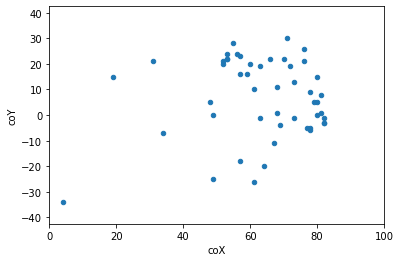

In [112]:
sog_df.plot(x="coX", y="coY", kind="scatter",colormap="YlOrRd")
plt.xlim(0,100)
plt.ylim(-42.5,42.5)

In [98]:
sog_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
448,2019020002,66,Goal,"Alex Ovechkin (1) Snap Shot, assists: John Car...",1,15:37,REGULAR,2,1,57.0,-18.0,8471214,Scorer,8474590,Assist,8474189.0,Assist,8476412.0,Goalie
16743,2019020052,124,Goal,"Alex Ovechkin (2) Slap Shot, assists: John Car...",2,04:46,REGULAR,1,2,53.0,22.0,8471214,Scorer,8474590,Assist,8475744.0,Assist,8471469.0,Goalie
16802,2019020052,183,Goal,"Alex Ovechkin (3) Slap Shot, assists: John Car...",2,17:36,REGULAR,2,4,60.0,20.0,8471214,Scorer,8474590,Assist,8473563.0,Assist,8471469.0,Goalie
22769,2019020070,326,Goal,"Alex Ovechkin (4) Backhand, assists: Tom Wilso...",3,19:03,REGULAR,1,4,4.0,-34.0,8471214,Scorer,8476880,Assist,0.0,0,0.0,0
26880,2019020083,312,Goal,"Alex Ovechkin (5) Slap Shot, assists: Evgeny K...",3,17:39,REGULAR,3,5,34.0,-7.0,8471214,Scorer,8475744,Assist,8474590.0,Assist,8475831.0,Goalie
40599,2019020126,247,Goal,"Alex Ovechkin (6) Wrist Shot, assists: John Ca...",3,03:52,REGULAR,1,3,61.0,10.0,8471214,Scorer,8474590,Assist,8479482.0,Assist,8470645.0,Goalie
45460,2019020142,195,Goal,"Alex Ovechkin (7) Snap Shot, assists: Nicklas ...",2,16:35,REGULAR,2,3,63.0,19.0,8471214,Scorer,8473563,Assist,8475462.0,Assist,8475660.0,Goalie
49181,2019020154,155,Goal,"Alex Ovechkin (8) Tip-In, assists: Jonas Siege...",2,06:27,REGULAR,1,2,68.0,11.0,8471214,Scorer,8478399,Assist,8474590.0,Assist,8475156.0,Goalie
49223,2019020154,197,Goal,"Alex Ovechkin (9) Snap Shot, assists: Tom Wils...",2,13:40,REGULAR,1,3,73.0,13.0,8471214,Scorer,8476880,Assist,8477944.0,Assist,8475156.0,Goalie
57478,2019020180,242,Goal,"Alex Ovechkin (10) Snap Shot, assists: T.J. Os...",3,04:10,REGULAR,3,3,81.0,8.0,8471214,Scorer,8471698,Assist,8473563.0,Assist,8475883.0,Goalie


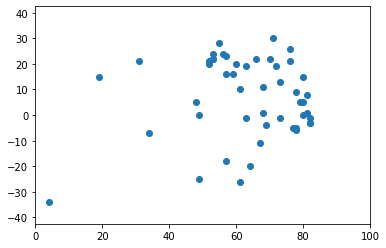

In [94]:
x = sog_df['coX']
y = sog_df['coY']
plt.xlim(0,100)
plt.ylim(-42.5,42.5)
plt.scatter(x, y)

/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/3625213899.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = [''], fontsize = 18,
/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/3625213899.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels = [''], fontsize = 18,


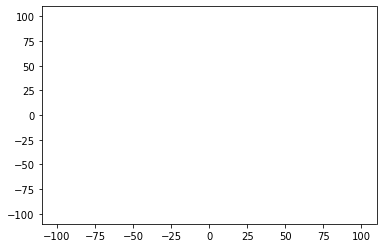

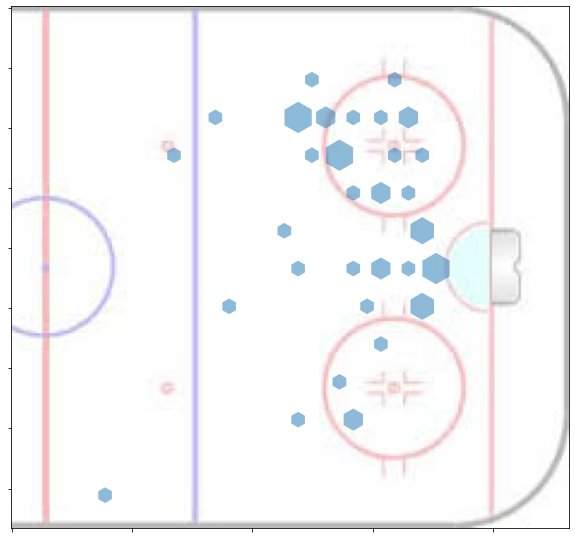

In [93]:
from PIL import Image
import math
from matplotlib.patches import RegularPolygon
xbnds = np.array([-100.,100.0])
ybnds = np.array([-100,100])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]

gridsize= 30;mincnt=0
# First we will used the hexbin function to simply bucket our shot data into basically a 2D histogram
league_hex_data = plt.hexbin(sog_df['coX'],
   sog_df['coY'],gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)
# Now we extract the bin coordinates and counts
league_verts = league_hex_data.get_offsets();
league_shot_frequency = league_hex_data.get_array();
# Do the same thing for the goal data
league_goal_hex_data =  plt.hexbin(sog_df['coX'],
   sog_df['coY'],gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)
# Since the grid is the same we can use a shared bin coordinate set from the above. So here we just get the counts
league_goal_frequency = league_goal_hex_data.get_array();

# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)
# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
# Using pillow to get the rink image and extract the image size
I = Image.open('hockeyrink.jpeg')
ax.imshow(I);width, height = I.size

# Calculate the scaling factor and offset (trial and error)
scalingx=width/100-0.6;
scalingy=height/100+0.5;
x_trans=33;
y_trans=height/2
# We will want to scale the size of our hex bins with the image so we calculate a "radius" scaling factor here
S = 3.8*scalingx;

# Loop over the locations and draw the hex
for i,v in enumerate(league_verts):
   # Ignore empty locations
   if league_shot_frequency[i] < 1:continue
   # Normalize the shot frequency data between 0-1 
   scaled_league_shot_frequency = league_shot_frequency[i]/max(league_shot_frequency)
   # Scale the hexagon size based on shot frequency
   radius = S*math.sqrt(scaled_league_shot_frequency)
   # Finally we will plot the hexagon including the scaling and
   #translations we found earlier
   hex = RegularPolygon((x_trans+v[0]*scalingx, 
      y_trans-v[1]*scalingy),numVertices=6, radius=radius,
      orientation=np.radians(0),alpha=0.5, edgecolor=None)
   ax.add_patch(hex)

In [43]:
events_df.head()

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,goalsHome,goalsAway,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
1,2019020001,1,Period Ready,Period Ready,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
2,2019020001,2,Period Start,Period Start,1,00:00,REGULAR,0,0,0.0,0.0,0,0,0,0,0.0,0,0.0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,00:00,REGULAR,0,0,0.0,0.0,8475166,Winner,8478400,Loser,0.0,0,0.0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,00:25,REGULAR,0,1,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400.0,Assist,8475883.0,Goalie


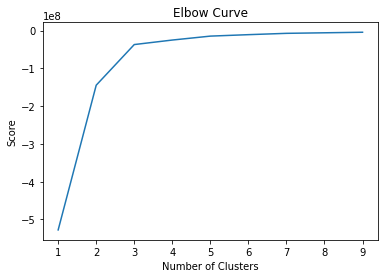

In [23]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = events_df[['coX']]
X_axis = events_df[['coY']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [91]:
#sog_df.to_csv('oveckin.csv', index=False)

In [282]:
X = sog_df.loc[:,['coX','coY']]
X.head(10)

,coX,coY
4205,34.0,12.0
4229,71.0,18.0
14422,49.0,31.0
14495,77.0,-1.0
20489,79.0,-1.0
20626,82.0,3.0
25700,84.0,4.0
25876,67.0,-14.0
25885,49.0,27.0
25915,73.0,-0.0


In [283]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[0:2]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[0:2]]) # Labels of each point
X

,coX,coY,cluster_label
4205,34.0,12.0,4
4229,71.0,18.0,3
14422,49.0,31.0,1
14495,77.0,-1.0,3
20489,79.0,-1.0,3
20626,82.0,3.0,3
25700,84.0,4.0,3
25876,67.0,-14.0,0
25885,49.0,27.0,1
25915,73.0,-0.0,3


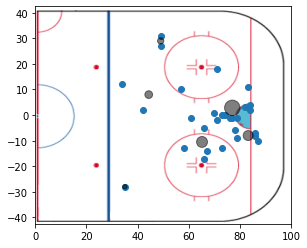

In [285]:
#Kiszamoljuk a pottyok meretet, a klaszterek elemszamat vesszuk es megszorozzuk 50-el.
size = X.groupby(['cluster_label']).count()
size = size['coX']*20
#print(size)
#X.plot.scatter(x = 'coX', y = 'coY', c=labels, s=50, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size, alpha=0.5)
#plt.xlim(0,100)
#plt.ylim(-42.5,42.5)

#Ket valtozot inicializalunk aminek megadjuk az X es Y oszlopunkat, hogy kesobb be tudjuk taplalni a plot-ba
coX = X['coX']
coY = X['coY']
img = plt.imread("Half_ice_hockey_rink.png")
fig, ax = plt.subplots()
ax.imshow(img, extent=[0, 100, -42.5, 42.5])
ax.scatter(coX, coY)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=size, alpha=0.5)
plt.xlim(0,100)
plt.ylim(-42.5,42.5)
plt.show()

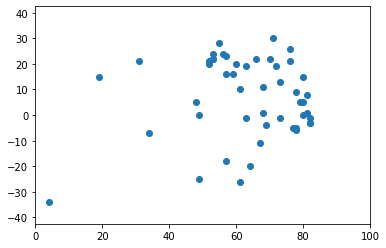

In [89]:
x = sog_df['coX']
y = sog_df['coY']
plt.xlim(0,100)
plt.ylim(-42.5,42.5)
plt.scatter(x, y)

In [149]:
X = sog_df.loc[:,['player1Id','player2Id']]
#X = X.groupby(['player2Id']).count()
X = X.groupby(['player2Id']).count().reset_index().sort_values(by='player1Id', ascending=False)
#X.sort_values(by=['count'])
X

,player2Id,player1Id
4,8474590,14
6,8475744,8
3,8473563,6
5,8475200,6
8,8476880,5
2,8471698,4
0,0,1
1,8469454,1
7,8476316,1
9,8477424,1


In [205]:
events_df

,gameId,eventId,eventType,eventTypeDesc,period,periodTime,periodType,teamAwayID,teamHomeID,goalsHome,...,coX,coY,player1Id,player1Type,player2Id,player2Type,player3Id,player3Type,player4Id,player4Type
0,2019020001,0,Game Scheduled,Game Scheduled,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,2019020001,1,Period Ready,Period Ready,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,2019020001,2,Period Start,Period Start,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,2019020001,3,Faceoff,John Tavares faceoff won against Colin White,1,0 days 00:00:00,REGULAR,9,10,0,...,0.0,0.0,8475166,Winner,8478400,Loser,0,0,0,0
4,2019020001,4,Goal,"Brady Tkachuk (1) Tip-In, assists: Connor Brow...",1,0 days 00:00:25,REGULAR,9,10,0,...,85.0,-1.0,8480801,Scorer,8477015,Assist,8478400,Assist,8475883,Goalie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183653,2019021082,303,Blocked Shot,Martin Frk shot blocked shot by Anthony Duclair,3,0 days 00:19:47,REGULAR,9,26,3,...,-51.0,-27.0,8477407,Blocker,8476924,Shooter,0,0,0,0
183654,2019021082,304,Period End,End of 3rd Period,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0
183655,2019021082,305,Period Official,Period Official,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0
183656,2019021082,306,Game End,Game End,3,0 days 00:20:00,REGULAR,9,26,3,...,0.0,0.0,0,0,0,0,0,0,0,0


In [242]:
sog_tl = events_df.loc[:,['gameId','eventType','teamAwayID','teamHomeID','period','periodTime']]
sog_tl = sog_tl[sog_tl['gameId'].isin([2019020001])]
sog_tl = sog_tl[sog_tl['eventType'].isin(['Shot','Goal'])]

sog_tl = sog_tl.drop(columns='eventType')

        
for idx, i in enumerate(sog_tl['period']):
    if i==1:
        #print(i, sog_df['coY'].iloc[idx])
        sog_tl['periodTime'].iloc[idx] = sog_tl['periodTime'].iloc[idx]
    elif i==2:
        sog_tl['periodTime'].iloc[idx] = sog_tl['periodTime'].iloc[idx]+'00:20:00'
    elif i==3:
        sog_tl['periodTime'].iloc[idx] = sog_tl['periodTime'].iloc[idx]+'00:40:00'

#tmp_games_df = tmp_games_df.assign(teamHomeID = i['gameData']['teams']['home']['id'])

#sog_tl = sog_tl.groupby(['period'])
#.count().reset_index().sort_values(by='player1Id', ascending=False)
sog_tl

/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/1434610185.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sog_tl['periodTime'].iloc[idx] = sog_tl['periodTime'].iloc[idx]
/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/1434610185.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sog_tl['periodTime'].iloc[idx] = sog_tl['periodTime'].iloc[idx]+'00:20:00'
/var/folders/z6/nzpwwscs6qj7t6gldff9vtlw0000gn/T/ipykernel_77575/1434610185.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.p

,gameId,teamAwayID,teamHomeID,period,periodTime
4,2019020001,9,10,1,0 days 00:00:25
12,2019020001,9,10,1,0 days 00:01:31
19,2019020001,9,10,1,0 days 00:03:23
22,2019020001,9,10,1,0 days 00:03:56
27,2019020001,9,10,1,0 days 00:04:47
...,...,...,...,...,...
361,2019020001,9,10,3,0 days 00:57:45
362,2019020001,9,10,3,0 days 00:57:45
368,2019020001,9,10,3,0 days 00:58:22
369,2019020001,9,10,3,0 days 00:58:44


In [243]:
sog_tl.dtypes

gameId                  int64
teamAwayID              int64
teamHomeID              int64
period                  int64
periodTime    timedelta64[ns]
dtype: object

In [249]:
fig, ax = plt.subplots()

myFmt = DateFormatter("%H:%M:%S")
ax.yaxis.set_major_formatter(myFmt)

ax.plot(sog_tl['periodTime'], sog_tl['periodTime'])

plt.gcf().autofmt_xdate()

plt.show()

OverflowError: int too big to convert

<Figure size 432x288 with 1 Axes>